In [1]:
import sys
import pickle
import numpy as np
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
# measure performance 计算回归准确性
def print_measure_performance(test, test_predict):
    # 平均绝对误差
    print("Mean absolute error = ", round(sm.mean_absolute_error(test, test_predict), 2))
    # 均方误差
    print("Mean squared error = ", round(sm.mean_squared_error(test, test_predict), 2))
    # 中位数绝对误差
    print("Median absolute error = ", round(sm.median_absolute_error(test, test_predict), 2))
    # 解释方差分
    print("Explain variance score = ", round(sm.explained_variance_score(test, test_predict), 2))
    # R方得分
    print("R2 score = ", round(sm.r2_score(test, test_predict), 2))

In [3]:
filename = "./data/data_singlevar.txt"
X = []
y = []
with open(filename, 'r') as f:
    for line in f.readlines():
        xt, yt = [float(i) for i in line.split(',')]
        X.append(xt)
        y.append(yt)

# Train/test split
num_training = int(0.8 * len(X))
num_test = len(X) - num_training

In [4]:
# Training data
X_train = np.array(X[:num_training]).reshape((num_training,1))
y_train = np.array(y[:num_training])

# Test data
X_test = np.array(X[num_training:]).reshape((num_test,1))
y_test = np.array(y[num_training:])

In [5]:
# Create linear regression object
linear_regressor = linear_model.LinearRegression()

# Train the model using the training sets
linear_regressor.fit(X_train, y_train)

# Predict the output
y_test_pred = linear_regressor.predict(X_test)

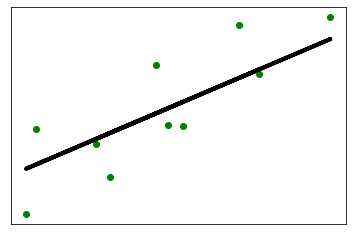

In [6]:
# Plot outputs
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_test_pred, color='black', linewidth=4)
plt.xticks(())
plt.yticks(())
plt.show()

In [8]:
# Measure performance
print_measure_performance(y_test, y_test_pred)

# Model persistence
output_model_file = './data/model/3_model_linear_regr.pkl'

with open(output_model_file, 'wb') as f:
    pickle.dump(linear_regressor, f)

with open(output_model_file, 'rb') as f:
    model_linregr = pickle.load(f)

y_test_pred_new = model_linregr.predict(X_test)
print ("New mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred_new), 2))

Mean absolute error =  0.54
Mean squared error =  0.38
Median absolute error =  0.54
Explain variance score =  0.68
R2 score =  0.68
New mean absolute error = 0.54
